<a href="https://colab.research.google.com/github/Gichere/random-forest-with-PCA/blob/main/PCA_with_Scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementing PCA with Scikit-Learn
In this project PCA will be implemented with the help of Python's Scikit-Learn library. The classical machine learning pipeline will be followed where, first, import libraries and dataset, perform exploratory data analysis and preprocessing, and finally train the models, make predictions and evaluate accuracies. The only additional step is perform PCA to find out optimal number of features before training the models.

There are various factors that cause performance bottlenecks while developing machine learning models. Large number of features in the dataset is one of the factors that affect both the training time as well as accuracy of machine learning models. There are different options to deal with huge number of features in a dataset.

*   Try to train the models on original number of features, which take days or weeks if the number of features is too high.
*   Reduce the number of variables by merging correlated variables.
*   Extract the most important features from the dataset that are responsible for maximum variance in the output. Different statistical techniques are used for this purpose e.g. linear discriminant analysis, factor analysis, and principal component analysis.

# Principal Component Analysis (PCA)
PCA is a statistical technique to convert high dimensional data to low dimensional data by selecting the most important features that capture maximum information about the dataset. The features are selected on the basis of variance that they cause in the output. The feature that causes highest variance is the first principal component. The feature that is responsible for second highest variance is considered the second principal component, and so on. It is important to mention that principal components do not have any correlation with each other.
## Advantages of PCA
*   It is not always possible to analyze data in high dimensions. For instance if there are 100 features in a dataset. Total number of scatter plots required to visualize the data would be 100(100-1)2 = 4950. Practically it is not possible to analyze data this way.
*   The training time of the algorithms reduces significantly with less number of features.

## Normalization of Features
It is important to mention that a feature set must be normalized before applying PCA. For instance if a feature set has data expressed in units of Kilograms, Light years, or Millions, the variance scale is huge in the training set. If PCA is applied on such a feature set, the resultant loadings for features with high variance will also be large. Hence, principal components will be biased towards features with high variance, leading to false results.

Finally, the last point to remember is that PCA is a statistical technique and can only be applied to numeric data. Therefore, categorical features are required to be converted into numerical features before PCA can be applied.

## Importing the libraries

In [131]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## Importing the data
In this PCA project, Iris dataset will be used

In [132]:
url = "https://raw.githubusercontent.com/Gichere/datasets/main/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(url, names=names)

The dataset consists of 150 records of Iris plant with four features: 'sepal-length', 'sepal-width', 'petal-length', and 'petal-width'. All of the features are numeric. The records have been classified into one of the three classes i.e. 'Iris-setosa', 'Iris-versicolor', or 'Iris-verginica'

In [133]:
# Inspecting the first five rows of the dataset
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Preprocessing
The first preprocessing step is to divide the dataset into a feature set and corresponding labels.
The next step is to divide the dataset into training and testing set

In [134]:
X = dataset.drop('Class', 1)
y = dataset['Class']
# The script above stores the feature sets into the X variable and 
# the series of corresponding labels in to the y variable.

In [135]:
# Dividing the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

As mentioned earlier, PCA performs best with a normalized feature set. Standard scalar normalization will be used to normalize the feature set

In [136]:
#Normalizing the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Implementing PCA
PCA depends only upon the feature set and not the label data. 


In [137]:
pca = PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
# in this code, a PCA object named pca is created. Usually the number of
# components is defined in the constructor but it was not defined here hence
# all the features in the feature set will be returned by the transform method
# for both training and testing sets.

In [138]:
explained_variance = pca.explained_variance_ratio_
# he PCA class contains explained_variance_ratio_ which returns the variance caused
# by each of the principal components. 
# The explained_variance variable is now a float type array which contains variance
# ratios for each principal component

In [139]:
explained_variance

array([0.72226528, 0.23974795, 0.03338117])

It can be seen that first principal component is responsible for 76.13% variance. Similarly, the second principal component causes 17.54% variance in the dataset. Collectively we can say that (76.13 + 17.54) 93.67% percent of the classification information contained in the feature set is captured by the first two principal components.

## Training and making Predictions using Random Forest algorithm

In [140]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [141]:
# Predicting the test set results
y_pred = classifier.predict(X_test)

## Performance Evaluation

In [142]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy', accuracy_score(y_test, y_pred))

[[11  0  0]
 [ 0  8  5]
 [ 0  1  5]]
Accuracy 0.8


It can be seen from the output that using all the features, the random forest algorithm is able to correctly predict with 90% accuracy.
Before deciding on using all the components, I run the model using 1, 2 and 3 components with accuracy levels of 93.3%, 80%, and 80% respectively.
It is important to mention that the accuracy of a classifier doesn't necessarily improve with increased number of principal components as proven above.The number of principal components to retain in a feature set depends on several conditions such as storage capacity, training time, performance, etc. In some dataset all the features are contributing equally to the overall variance, therefore all the principal components are crucial to the predictions and none can be ignored. 
A general rule of thumb is to take number of principal of principal components that contribute to significant variance and ignore those with diminishing variance returns.

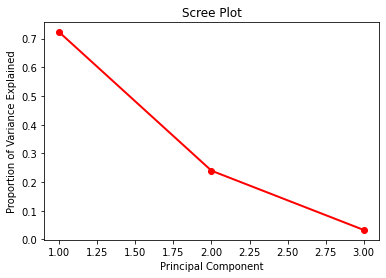

In [145]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

Plotting the variance against principal components and ignoring the principal components with diminishing values as shown in the following graph above.
In the chart above, it cn be seen that after the third principal component the change in variance almost diminishes. Therefore, first three components can be selected and the last one is ignored.
